# Final Project Report

* Class: DS 5100
* Student Name: Heejeong Yoon (Angie)
* Student Net ID:rpk3ve
* This URL: a URL to the notebook source of this document

# Instructions

Follow the instructions in the Final Project isntructions notebook and put evidence of your work in this notebook.

Total points for each subsection under **Deliverables** and **Scenarios** are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth **50 points**.

# Deliverables

## The Monte Carlo Module (10)

- URL included, appropriately named (1).
- Includes all three specified classes (3).
- Includes at least all 12 specified methods (6; .5 each).

Put the URL to your GitHub repo here.

Repo URL:https://github.com/baicalein/Monte-Carlo-Simulator.git

### in this URL, 
- **3 Classes**:
    - `Die`
    - `Game`
    - `Analyzer`
- **12 Methods**:
    - `Die` class methods: `__init__`, `change_weight`, `roll`, `show`
    - `Game` class methods: `__init__`, `play`, `show`
    - `Analyzer` class methods: `__init__`, `jackpot`, `face_counts_per_roll`, `combo_count`, `permutation_count`


Paste a copyy of your module here.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

# A code block with your classes.
### Die.py

```
import numpy as np
import pandas as pd

class Die:
    """
    Assign a die with faces and their weights for each face.
    Each face is distict and can be weighted to simulate a die. 
    Die to be rolled to produce outcomes based on given weights.

    Attributes:
        faces: An array of unique faces with symbols that may be all alphabetic or all numeric).
        weights: An array of weights for each face, default=1.
        _facesweights: A private DataFrame to store faces and weights.
    """
    def __init__(self, faces):
        """
        Initialize die with a set of faces.

        Parameters:
            faces:NumPy array of unique symbols that may be strings or numbers.
                Raises TypeError if not a NumPy array.
                Raises ValueError if faces are not unique.
        """
        if not isinstance(faces, np.ndarray):
            raise TypeError("faces must be Numpy array.")
        if len(faces)!=len(set(faces)):
            raise ValueError("face values must be distint.")
        self.faces=faces
        self.weights = np.ones(len(faces))
        self._df=pd.DataFrame({'weights': self.weights}, index=self.faces)
        
    def change_weight(self, face, new_weight):
        """
        Change the weight of a certain face.

        Parameters:
            face: The face value whose weight to be changed.
            new_weight: The new weight for the specified face. Must be positive numeric value, including 0. Raises IndexError if face is not valid.
                        Raises TypeError if new_weights is non-numeric.
        
        Raises:
            IndexError: If face is not in the face value of die.
            TypeError: If new_weight is non-numeric.
        """
        if face not in self._df.index:
            raise IndexError("Your faces value is not your die.")
        try: 
            new_weight = float(new_weight)
            if new_weight<0:
                raise ValueError("weight must be positive number, including 0.")
        except ValueError:
            raise TypeError("weight must be numbers.")
        self._df.loc[face, 'weight'] = new_weight
    def roll(self, num_rolls=1):
        """
        Roll the die a given number of times.

        Parameters:num_rolls: The number of rolling the die(integer). Defaults=1.

        Returns:A list of outcomes from the rolls.
        """
        return self._df.sample(n=num_rolls, weights='weights', replace=True).index.tolist()
        
    def show(self):
        """
        Show the current state of the die(faces and weights).

        Returns:pd.DataFrame: the DataFrame containing faces and their weights.
        """
        return self._df.copy()
    
```

### Game.py
```
import numpy as np
import pandas as pd
    
class Game:
    """
    Game consists of one or more rolls of similar dice (Die objects).
    
    Each game rolls a list of similar dice a given number of times and recording
    its results.

    Attributes:
        dice: list of Die objects representing the dice in the game.
        _results_df: Private DataFrame to store the results of the 
                                    most recent play.
    """
    def __init__(self, dice):
        """
        Initializes Game with die objects.

        Parameters:dice: list of die objects to play the game.
        """
        self.dice = dice
        self._results_df = None  # attribute to store the results of the most recent play
    def play(self, num_rolls):
        """
        Rolls each die in the game a given number of times.

        Parameters:
            num_rolls:Integer, the number of times to roll each die.
        
        Update:
            self._results_df: Stores the results of the rolls in a DataFrame, where
                              each row represents a roll and each column represents a die.
        """
        results = {}
        for i, die in enumerate(self.dice):
            results[i] = die.roll(num_rolls)  # Roll each die and store results with index as column name

        # Store the results into a DataFrame in wide format
        self._results_df = pd.DataFrame(results)
        self._results_df.index.name = 'roll_number'  # Name the index as 'roll_number'
    def show(self, form='wide'):
        """
        Show the results of the most recent play in the given format.

        Parameters:
            form:string,format of the results ('wide' or 'narrow'). Defaults='wide'.
                        Raises ValueError if form is invalid.

        Returns:DataFrame storing the results in the requested format.

        Raises: ValueError: If form is neither 'wide' nor 'narrow'.
        """
        if form == 'wide':
            return self._results_df.copy()
        elif form == 'narrow': # Convert to narrow format with MultiIndex (roll number and die number)
            narrow_df = self._results_df.stack().to_frame('outcome')
            narrow_df.index.names = ['roll_number', 'die_number']
            return narrow_df
        else:
            raise ValueError("Form must be either'wide' or 'narrow' only.")
```

### Analyzer.py
```
import numpy as np
import pandas as pd  
from MonteCarlo.Game import Game

class Analyzer:
    """
    Analyzes the results of a game, computing statistical properties about it.

    Attributes:
        game: The Game object to analyze its results.
        results: DataFrame containing the results of the most recent game.
    """
    def __init__(self, game):
        """
        Initializes the Analyzer with game object.

        Parameters:
            game: The Game object to analyze its results.
        """
        # Throws a ValueError if the passed value is not a Game object.
        if not isinstance(game, Game):
            raise ValueError("the passed value must be Game object.")
        
        self.game = game
        self.results = game.show('wide')  # the most results in wide format

    def jackpot(self):
        """
        Calculates the number of jackpot rolls, a result in which all faces are the same.

        Returns: Integer, the number of jackpots in game.
        """
        # Count rows where all values in a roll are the same
        jackpot_count = (self.results.nunique(axis=1) == 1).sum()
        return int(jackpot_count)

    def face_counts_per_roll(self):
        """
        Computes how many times a given face is rolled in each event..

        Returns:DataFrame with an index of the roll number, 
            face values as columns, and count values in the cells 
        """
        # Count occurrences of each face for each roll
        face_counts = self.results.apply(pd.Series.value_counts, axis=1).fillna(0).astype(int)
        face_counts.index.name = 'roll_number'
        return face_counts

    def combo_count(self):
        """
        Calculates distinct combinations of faces rolled, along with their counts.
            order-independent and may contain repetitions.
        Returns:DataFrame with MultiIndex(combinations as index and counts as a single column).
        """
        # Find distinct combinations (order-independent) and their counts
        sorted_rolls = self.results.apply(lambda x: tuple(sorted(x)), axis=1)
        combo_counts = sorted_rolls.value_counts().to_frame('count')
        combo_counts.index.name = 'combination'
        return combo_counts

    def permutation_count(self):
        """
        Calculate distinct permutations of faces rolled, along with their counts,
            permutaton: order-dependent and may contain repetitions.

        Returns:DataFrame with MultiIndex(permutations as index and counts as a single column).
        """
        # Find distinct permutations (order-dependent) and their counts
        perm_counts = self.results.apply(tuple, axis=1).value_counts().to_frame('count')
        perm_counts.index.name = 'permutation'
        return perm_counts
```

## Unitest Module (2)

Paste a copy of your test module below.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

- All methods have at least one test method (1).
- Each method employs one of Unittest's Assert methods (1).

##A code block with your test code.
### test_montecarlo.py

```
import unittest
import numpy as np
from pandas import DataFrame
from MonteCarlo.Die import Die
from MonteCarlo.Game import Game
from MonteCarlo.Analyzer import Analyzer

class TestDie(unittest.TestCase):
    def setUp(self):
        """Set up a die with numeric faces for testing."""
        faces = np.array([1, 2, 3, 4, 5, 6])
        self.die = Die(faces)

    def test_init(self):
        """Test if Die initializes with correct structure."""
        self.assertIsInstance(self.die._df, DataFrame)
        self.assertEqual(len(self.die._df), 6)
        
    def test_change_weight(self):
        """Test if changing weight updates the weight in the DataFrame."""
        self.die.change_weight(2, 3.5)
        self.assertEqual(self.die._df.at[2, 'weight'], 3.5)
        


    def test_roll(self):
        """Test if roll returns a list with correct number of elements."""
        rolls = self.die.roll(5)
        self.assertIsInstance(rolls, list)
        self.assertEqual(len(rolls), 5)

    def test_show(self):
        """Test if show returns a DataFrame copy."""
        df_copy = self.die.show()
        self.assertIsInstance(df_copy, DataFrame)
        self.assertEqual(len(df_copy), len(self.die._df))
        self.assertNotEqual(id(df_copy), id(self.die._df))  # Ensure it's a copy

class TestGame(unittest.TestCase):
    def setUp(self):
        """Set up a game with two dice for testing."""
        faces = np.array([1, 2, 3, 4, 5, 6])
        die1 = Die(faces)
        die2 = Die(faces)
        self.game = Game([die1, die2])

    def test_play(self):
        """Test if play stores results in a DataFrame with correct structure."""
        self.game.play(5)
        self.assertIsInstance(self.game._results_df, DataFrame)
        self.assertEqual(self.game._results_df.shape, (5, 2))  # 5 rolls, 2 dice

    def test_show_wide(self):
        """Test if show returns a wide DataFrame by default."""
        self.game.play(5)
        result_df = self.game.show()
        self.assertIsInstance(result_df, DataFrame)
        self.assertEqual(result_df.shape, (5, 2))  # 5 rolls, 2 dice

    def test_show_narrow(self):
        """Test if show returns a narrow DataFrame when specified."""
        self.game.play(5)
        narrow_df = self.game.show('narrow')
        self.assertIsInstance(narrow_df, DataFrame)
        self.assertEqual(narrow_df.index.names, ['roll_number', 'die_number'])
        self.assertEqual(narrow_df.shape, (10, 1))  # 5 rolls * 2 dice = 10 entries

class TestAnalyzer(unittest.TestCase):
    def setUp(self):
        """Set up an Analyzer with a Game object for testing."""
        faces = np.array([1, 2, 3, 4, 5, 6])
        die1 = Die(faces)
        die2 = Die(faces)
        game = Game([die1, die2])
        game.play(10)
        self.analyzer = Analyzer(game)
    
    def test_analyzer_init_invalid_game(self):
        """Test if Analyzer raises ValueError when initialized with a non-Game object."""
        with self.assertRaises(ValueError):
            invalid_game = "not_a_game"  # Not a Game object
            Analyzer(invalid_game)

    
    def test_jackpot(self):
        """Test if jackpot returns an integer."""
        jackpot_count = self.analyzer.jackpot()
        self.assertIsInstance(jackpot_count, int)

    def test_face_counts_per_roll(self):
        """Test if face_counts_per_roll returns a DataFrame with correct structure."""
        face_counts = self.analyzer.face_counts_per_roll()
        self.assertIsInstance(face_counts, DataFrame)
        self.assertEqual(face_counts.index.name, 'roll_number')

    def test_combo_count(self):
        """Test if combo_count returns a DataFrame with combinations and counts."""
        combo_counts = self.analyzer.combo_count()
        self.assertIsInstance(combo_counts, DataFrame)
        self.assertEqual(combo_counts.index.name, 'combination')
        self.assertIn('count', combo_counts.columns)

    def test_permutation_count(self):
        """Test if permutation_count returns a DataFrame with permutations and counts."""
        perm_counts = self.analyzer.permutation_count()
        self.assertIsInstance(perm_counts, DataFrame)
        self.assertEqual(perm_counts.index.name, 'permutation')
        self.assertIn('count', perm_counts.columns)

# Run the tests
if __name__ == '__main__':
    unittest.main()
```


## Unittest Results (3)

Put a copy of the results of running your tests from the command line here.

Again, paste as text using triple backticks.

- All 12 specified methods return OK (3; .25 each).


### Unittest result
```
Ran 12 tests in 0.017s

OK
bash-4.4$
```

## Import (1)

Import your module here. This import should refer to the code in your package directory.

- Module successuflly imported (1).

In [2]:
# e.g. import montecarlo.montecarlo 

from MonteCarlo.Die import Die
from MonteCarlo.Game import Game
from MonteCarlo.Analyzer import Analyzer


## Help Docs (4)

Show your docstring documentation by applying `help()` to your imported module.

- All methods have a docstring (3; .25 each).
- All classes have a docstring (1; .33 each).

In [7]:
# Die class and its methods
help(Die)

Help on class Die in module MonteCarlo.Die:

class Die(builtins.object)
 |  Die(faces)
 |  
 |  Assign a die with faces and their weights for each face.
 |  Each face is distict and can be weighted to simulate a die. 
 |  Die to be rolled to produce outcomes based on given weights.
 |  
 |  Attributes:
 |      faces: An array of unique faces with symbols that may be all alphabetic or all numeric).
 |      weights: An array of weights for each face, default=1.
 |      _facesweights: A private DataFrame to store faces and weights.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, faces)
 |      Initialize die with a set of faces.
 |      
 |      Parameters:
 |          faces:NumPy array of unique symbols that may be strings or numbers.
 |              Raises TypeError if not a NumPy array.
 |              Raises ValueError if faces are not unique.
 |  
 |  change_weight(self, face, new_weight)
 |      Change the weight of a certain face.
 |      
 |      Parameters:
 |          fac

In [8]:
# Game class and its methods
help(Game)

Help on class Game in module MonteCarlo.Game:

class Game(builtins.object)
 |  Game(dice)
 |  
 |  Game consists of one or more rolls of similar dice (Die objects).
 |  
 |  Each game rolls a list of similar dice a given number of times and recording
 |  its results.
 |  
 |  Attributes:
 |      dice: list of Die objects representing the dice in the game.
 |      _results_df: Private DataFrame to store the results of the 
 |                                  most recent play.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, dice)
 |      Initializes Game with die objects.
 |      
 |      Parameters:dice: list of die objects to play the game.
 |  
 |  play(self, num_rolls)
 |      Rolls each die in the game a given number of times.
 |      
 |      Parameters:
 |          num_rolls:Integer, the number of times to roll each die.
 |      
 |      Update:
 |          self._results_df: Stores the results of the rolls in a DataFrame, where
 |                            each row represe

In [9]:
# Analyzer class and its methods
help(Analyzer)

Help on class Analyzer in module MonteCarlo.Analyzer:

class Analyzer(builtins.object)
 |  Analyzer(game)
 |  
 |  Analyzes the results of a game, computing statistical properties about it.
 |  
 |  Attributes:
 |      game: The Game object to analyze its results.
 |      results: DataFrame containing the results of the most recent game.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, game)
 |      Initializes the Analyzer with game object.
 |      
 |      Parameters:
 |          game: The Game object to analyze its results.
 |  
 |  combo_count(self)
 |      Calculates distinct combinations of faces rolled, along with their counts.
 |          order-independent and may contain repetitions.
 |      Returns:DataFrame with MultiIndex(combinations as index and counts as a single column).
 |  
 |  face_counts_per_roll(self)
 |      Computes how many times a given face is rolled in each event..
 |      
 |      Returns:DataFrame with an index of the roll number, 
 |          face va

## `README.md` File (3)

Provide link to the README.md file of your project's repo.

- Metadata section or info present (1).
- Synopsis section showing how each class is called (1). (All must be included.)
- API section listing all classes and methods (1). (All must be included.)

URL:https://github.com/baicalein/Monte-Carlo-Simulator/blob/main/README.md

## Successful installation (2)

Put a screenshot or paste a copy of a terminal session where you successfully install your module with pip.

If pasting text, use a preformatted text block to show the results.

- Installed with `pip` (1).
- Successfully installed message appears (1).

###Successful Installation

```
bash-4.4$pip install -e .
Defaulting to user installation because normal site-packages is not writeable
Obtaining file:///sfs/gpfs/tardis/home/rpk3ve/Monte-Carlo-Simulator
  Preparing metadata (setup.py) ... done
Installing collected packages: MonteCarlo
  Running setup.py develop for MonteCarlo
Successfully installed MonteCarlo-0.1
bash-4.4$
```



# Scenarios

Use code blocks to perform the tasks for each scenario.

Be sure the outputs are visible before submitting.

## Scenario 1: A 2-headed Coin (9)

Task 1. Create a fair coin (with faces $H$ and $T$) and one unfair coin in which one of the faces has a weight of $5$ and the others $1$.

- Fair coin created (1).
- Unfair coin created with weight as specified (1).

In [18]:
# Create a fair coin
import numpy as np
from MonteCarlo.Die import Die

faces = np.array(['H', 'T'])  # H for Heads, T for Tails
fair_coin = Die(faces)
print("Fair coin created with equal weights:")
print(fair_coin.show())

Fair coin created with equal weights:
   weights
H      1.0
T      1.0


In [19]:
# Create an unfair coin 
unfair_coin = Die(faces)
unfair_coin.change_weight('H', 5)  # Change the weight of 'H' (Heads) to 5
print("Unfair coin created with 'H' weighted 5 and 'T' weighted 1:")
print(unfair_coin.show())

Unfair coin created with 'H' weighted 5 and 'T' weighted 1:
   weights  weight
H      1.0     5.0
T      1.0     NaN


Task 2. Play a game of $1000$ flips with two fair dice.

- Play method called correclty and without error (1).

In [20]:
from MonteCarlo.Game import Game

# Initialize two fair coins
fair_coin1 = Die(faces)
fair_coin2 = Die(faces)

# Set up the game with the two fair coins
game = Game([fair_coin1, fair_coin2])

# Play the game for 1000 flips
game.play(1000)

print("Game played with 1000 flips using two fair coins.")

Game played with 1000 flips using two fair coins.


Task 3. Play another game (using a new Game object) of $1000$ flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

- New game object created (1).
- Play method called correclty and without error (1).

In [21]:
# Reuse the unfair coin from Task 1
unfair_coin1 = unfair_coin 

# Reuse the same unfair coin1 object
unfair_coin2 = unfair_coin  

# Initialize a new fair coin
fair_coin = Die(faces)

# Set up a new game with two unfair coins and one fair coin
new_game = Game([unfair_coin1, unfair_coin2, fair_coin])

In [23]:
# Play the new game for 1000 flips
new_game.play(1000) # called without error

Task 4. For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all $H$s or all $T$s.

- Analyzer objecs instantiated for both games (1).
- Raw frequencies reported for both (1).

In [25]:
# Analyzer objects instantiated for both games (1).

from MonteCarlo.Analyzer import Analyzer

# Analyzer for the first game (two fair coins)
analyzer_fair = Analyzer(game)  # `game` is the Game object from Task 2

# Analyzer for the second game (two unfair coins and one fair coin)
analyzer_mixed = Analyzer(new_game)  # `new_game` is the Game object from Task 3

In [26]:
# Raw frequencies reported for both (1).
jackpot_count_fair = analyzer_fair.jackpot()
print("Raw frequency of jackpots for game with two fair coins:", jackpot_count_fair)

jackpot_count_mixed = analyzer_mixed.jackpot()
print("Raw frequency of jackpots for game with two unfair coins and one fair coin:", jackpot_count_mixed)

Raw frequency of jackpots for game with two fair coins: 510
Raw frequency of jackpots for game with two unfair coins and one fair coin: 260


Task 5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

- Both relative frequencies computed (1).

In [27]:
# Calculate relative frequency for the first game (two fair coins)
relative_frequency_fair = jackpot_count_fair / 1000
print("Relative frequency of jackpots for game with two fair coins:", relative_frequency_fair)

# Calculate relative frequency for the second game (two unfair coins and one fair coin)
relative_frequency_mixed = jackpot_count_mixed / 1000
print("Relative frequency of jackpots for game with two unfair coins and one fair coin:", relative_frequency_mixed)

Relative frequency of jackpots for game with two fair coins: 0.51
Relative frequency of jackpots for game with two unfair coins and one fair coin: 0.26


Task 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

- Bar chart plotted and correct (1).

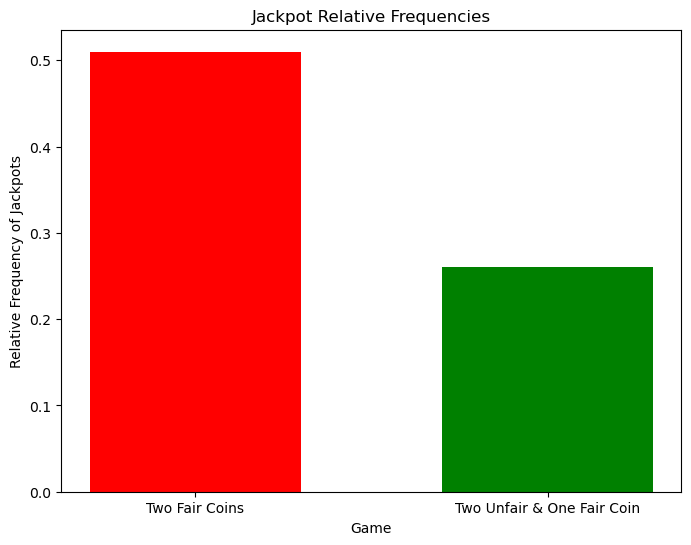

In [44]:
import matplotlib.pyplot as plt

# Labels for the games
games = ["Two Fair Coins", "Two Unfair & One Fair Coin"]

# Relative frequencies for each game
relative_frequencies = [relative_frequency_fair, relative_frequency_mixed]

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(games, relative_frequencies, width=0.6, color=['red', 'green'])
plt.xlabel("Game")
plt.ylabel("Relative Frequency of Jackpots")
plt.title("Jackpot Relative Frequencies")
plt.show()

## Scenario 2: A 6-sided Die (9)

Task 1. Create three dice, each with six sides having the faces 1 through 6.

- Three die objects created (1).

In [31]:
from MonteCarlo.Die import Die

# A six-sided die
faces = np.array([1, 2, 3, 4, 5, 6])

# Create 3 dice with these faces
die1 = Die(faces)
die2 = Die(faces)
die3 = Die(faces)

Task 2. Convert one of the dice to an unfair one by weighting the face $6$ five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

- Unfair die created with proper call to weight change method (1).

In [33]:
# Change die1 to an unfair die with the weight of face 6 to 5
die1.change_weight(6, 5)

# to confirm: Show the updated weights
print("Chnage die1 to an unfair die with the weight of face 6 to 5:")
print(die1.show())

Chnage die1 to an unfair die with the weight of face 6 to 5:
   weights  weight
1      1.0     NaN
2      1.0     NaN
3      1.0     NaN
4      1.0     NaN
5      1.0     NaN
6      1.0     5.0


Task 3. Convert another of the dice to be unfair by weighting the face $1$ five times more than the others.

- Unfair die created with proper call to weight change method (1).

In [34]:
# Convert die2 to an unfair die with the weight of face 1 to 5
die2.change_weight(1, 5)

# to confirm: Show the updated weights 
print("Convert die2 to an unfair die with the weight of face 1 to 5:")
print(die2.show())


Convert die2 to an unfair die with the weight of face 1 to 5:
   weights  weight
1      1.0     5.0
2      1.0     NaN
3      1.0     NaN
4      1.0     NaN
5      1.0     NaN
6      1.0     NaN


Task 4. Play a game of $10000$ rolls with $5$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [35]:
# Game class properly instantiated (1).
from MonteCarlo.Game import Game

# faces for a fair six-sided die
faces = np.array([1, 2, 3, 4, 5, 6])

# Create 5 fair dice
fair_die1 = Die(faces)
fair_die2 = Die(faces)
fair_die3 = Die(faces)
fair_die4 = Die(faces)
fair_die5 = Die(faces)

# Initialize a game with the 5 fair dice
fair_game = Game([fair_die1, fair_die2, fair_die3, fair_die4, fair_die5])

In [36]:
# Play method called properly (1).
# Play the game for 10,000 rolls
fair_game.play(10000)

Task 5. Play another game of $10000$ rolls, this time with $2$ unfair dice, one as defined in steps #2 and #3 respectively, and $3$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [38]:
# Game class properly instantiated (1).

# Use die1 and die2 from Tasks 2 and 3 (both are unfair dice)
unfair_die1 = die1  
unfair_die2 = die2 

# Initialize 3 fair dice with six faces each
fair_die3 = Die(faces)
fair_die4 = Die(faces)
fair_die5 = Die(faces)

# Initialize a game with all 5 dice from above
mixed_game = Game([unfair_die1, unfair_die2, fair_die3, fair_die4, fair_die5])

In [39]:
# Play method called properly (1).
# Play the game for 10,000 rolls
mixed_game.play(10000)

Task 6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

- Jackpot methods called (1).
- Graph produced (1).

In [42]:
# Jackpot methods called (1).

# Analyzer for the game with 5fair dice
analyzer_fair_game = Analyzer(fair_game)
jackpot_count_fair_game = analyzer_fair_game.jackpot()
relative_frequency_fair_game = jackpot_count_fair_game / 10000
# Display relative frequencies
print("Relative frequency of jackpots for the game with 5 fair dice:", relative_frequency_fair_game)

# Analyzer for the game with 2unfair, 3fair dice
analyzer_mixed_game = Analyzer(mixed_game)
jackpot_count_mixed_game = analyzer_mixed_game.jackpot()
relative_frequency_mixed_game = jackpot_count_mixed_game / 10000
# Display relative frequencies
print("Relative frequency of jackpots for the game with 2 unfair dice, 3fair dice:", relative_frequency_mixed_game)

Relative frequency of jackpots for the game with 5 fair dice: 0.0004
Relative frequency of jackpots for the game with 2 unfair dice, 3fair dice: 0.0008


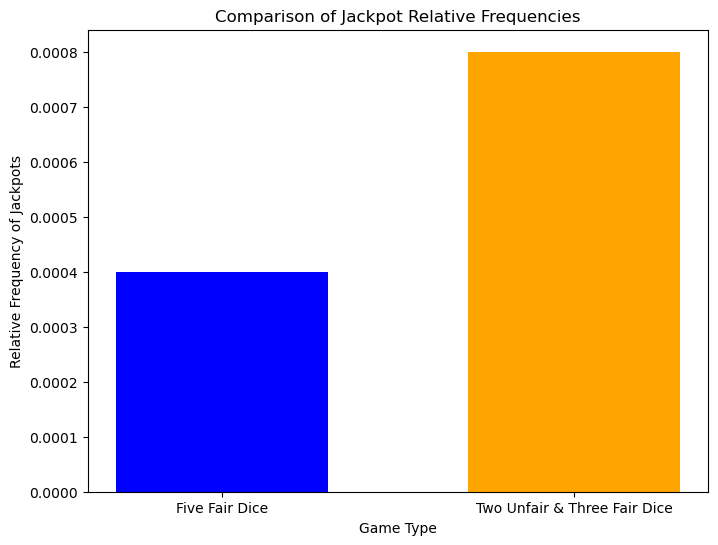

In [45]:
# Graph produced (1).
# Plotting the results in a bar chart
games = ["Five Fair Dice", "Two Unfair & Three Fair Dice"]
relative_frequencies = [relative_frequency_fair_game, relative_frequency_mixed_game]

plt.figure(figsize=(8, 6))
plt.bar(games, relative_frequencies, width=0.6, color=['blue', 'orange'])
plt.xlabel("Game Type")
plt.ylabel("Relative Frequency of Jackpots")
plt.title("Comparison of Jackpot Relative Frequencies")
plt.show()

## Scenario 3: Letters of the Alphabet (7)

Task 1. Create a "die" of letters from $A$ to $Z$ with weights based on their frequency of usage as found in the data file `english_letters.txt`. Use the frequencies (i.e. raw counts) as weights.

- Die correctly instantiated with source file data (1).
- Weights properly applied using weight setting method (1).

In [46]:

# Load english_letters.txt
with open('english_letters.txt') as file:
    data = file.readlines()

# Extract letters and their frequencies
letters = []
frequencies = []

for line in data:
    letter, frequency = line.strip().split()
    letters.append(letter)
    frequencies.append(int(frequency))

# Create a Die object with letters as faces and frequencies as weights
letter_die = Die(faces=np.array(letters))
for letter, weight in zip(letters, frequencies):
    letter_die.change_weight(letter, weight)

# to confirm dice and weights
print(letter_die.show())


   weights       weight
E      1.0  529117365.0
T      1.0  390965105.0
A      1.0  374061888.0
O      1.0  326627740.0
I      1.0  320410057.0
N      1.0  313720540.0
S      1.0  294300210.0
R      1.0  277000841.0
H      1.0  216768975.0
L      1.0  183996130.0
D      1.0  169330528.0
C      1.0  138416451.0
U      1.0  117295780.0
M      1.0  110504544.0
F      1.0   95422055.0
G      1.0   91258980.0
P      1.0   90376747.0
W      1.0   79843664.0
Y      1.0   75294515.0
B      1.0   70195826.0
V      1.0   46337161.0
K      1.0   35373464.0
J      1.0    9613410.0
X      1.0    8369915.0
Z      1.0    4975847.0
Q      1.0    4550166.0


Task 2. Play a game involving $4$ of these dice with $1000$ rolls.

- Game play method properly called (1).

In [47]:
# Create 4 letter dice
letter_die1 = letter_die  # Reuse the weighted die from Task 1
letter_die2 = letter_die
letter_die3 = letter_die
letter_die4 = letter_die

# Initialize a game with all 4 letter dice from above
letter_game = Game([letter_die1, letter_die2, letter_die3, letter_die4])

# Play the game for 1000 rolls
letter_game.play(1000)

Task 3. Determine how many permutations in your results are actual English words, based on the vocabulary found in `scrabble_words.txt`.

- Use permutation method (1).
- Get count as difference between permutations and vocabulary (1).

In [50]:
# Load scrabble_words.txt and get vocabulary from it
with open('scrabble_words.txt') as file:
    vocabulary = set(word.strip().upper() for word in file.readlines())

# Use Analyzer on the game results to obtain permutations
analyzer = Analyzer(letter_game)
permutations_df = analyzer.permutation_count()

# Count how many permutations are actual English words, based on vocabulary from above
actual_word_count = sum(1 for word in permutations_df.index if ''.join(word) in vocabulary)

# Display the results
print("Number of permutations which are actual English words:", actual_word_count)
print("Number off total permutations:", permutations_df['count'].sum())
print("difference between permutations and vocabulary:", permutations_df['count'].sum() - actual_word_count)


Number of permutations which are actual English words: 13
Number off total permutations: 1000
difference between permutations and vocabulary: 987


Task 4. Repeat steps #2 and #3, this time with $5$ dice. How many actual words does this produce? Which produces more?

- Successfully repreats steps (1).
- Identifies parameter with most found words (1).

In [55]:
# Reuse the weighted letter die from Task 1, we need just one more die
letter_die5 = letter_die

# Initialize a game with 5 letter dice
letter_game_5_dice = Game([letter_die1, letter_die2, letter_die3, letter_die4, letter_die5])

# Play the game with 1000 rolls
letter_game_5_dice.play(1000)

# Analyze permutations for the game with 5 dice
analyzer_5_dice = Analyzer(letter_game_5_dice)
permutations_df_5_dice = analyzer_5_dice.permutation_count()

# Count how many permutations are actual English words in the 5-dice game
actual_word_count_5_dice = sum(1 for word in permutations_df_5_dice.index if ''.join(word) in vocabulary)

# Display results for 5-dice game
print("Number of permutations which are actual English words (5 dice):", actual_word_count_5_dice)
print("Total permutations (5 dice):", permutations_df_5_dice['count'].sum())
print("difference between permutations and vocabulary (5 dice):", permutations_df_5_dice['count'].sum()-actual_word_count_5_dice )

Number of permutations which are actual English words (5 dice): 3
Total permutations (5 dice): 1000
difference between permutations and vocabulary (5 dice): 997


In [56]:
# Comparison
print("Comparison:")
print("Number of actual words with 4 dice:", actual_word_count)
print("Number of actual words with 5 dice:", actual_word_count_5_dice)

if actual_word_count_5_dice > actual_word_count:
    print("The game with 5 dice produced more actual English words.")
else:
    print("The game with 4 dice produced more actual English words.")

Comparison:
Number of actual words with 4 dice: 13
Number of actual words with 5 dice: 3
The game with 4 dice produced more actual English words.
